# STA5636 Homework 1
<br>
<br>
<div style="text-align: right"> Department of Staitistics<br>
Jaeyeong Kim </div>

## a) madelon dataset
### (1) Load the dataset

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

#This will be used to bold characters
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

X_train = pd.read_csv('madelon\madelon_train.data', header = None, delimiter = ' ').dropna(axis='columns')
#drop 501th column with NA values
print(color.BOLD + 'Summary of the basic information about X_train' + color.END)
print(X_train.info())
Y_train = pd.read_csv('madelon\madelon_train.labels', header = None, delimiter = ' ') 
print(color.BOLD + '\n\nSummary of the basic information about Y_train' + color.END)
print(Y_train.info())

X_valid = pd.read_csv('madelon\madelon_valid.data', header = None, delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('madelon\madelon_valid.labels', header = None, delimiter = ' ')

Summary of the basic information about X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 7.6 MB
None


Summary of the basic information about Y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
0    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB
None



### (2) Train the dataset

In [2]:
x = []

for i in range(12):
    #Train decision tree with max depth from 1 to 12
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i+1)  
    clf.fit(X_train, Y_train)
    
    #Calculate decision accuracy score of training dataset and validation dataset
    x1 = clf.score(X_train, Y_train)
    x2 = clf.score(X_valid, Y_valid)
    
    #Save the errors
    x.append([i+1, 1 - x1, 1 - x2])

x = pd.DataFrame(data = x, columns = ['Depth', 'Train', 'Valid'])

### (3) Tree Depth vs Misclassification Errors

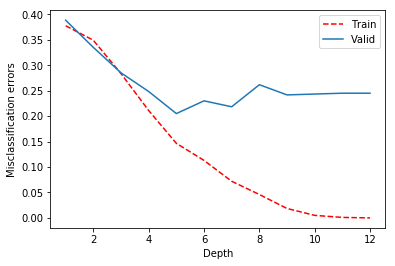

,Depth,Train,Valid
0,1,0.3775,0.388333
1,2,0.349,0.335
2,3,0.2835,0.285
3,4,0.211,0.248333
4,5,0.1465,0.205
5,6,0.113,0.23
6,7,0.072,0.218333
7,8,0.046,0.261667
8,9,0.0185,0.241667
9,10,0.005,0.243333


In [3]:
# Plot the results
plt.plot(x['Depth'], x['Train'], 'r--', x['Depth'], x['Valid'])
plt.xlabel('Depth')
plt.ylabel('Misclassification errors')
plt.legend(('Train', 'Valid'))
plt.show()



def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

x.style.apply(highlight_min, subset=['Train', 'Valid'])

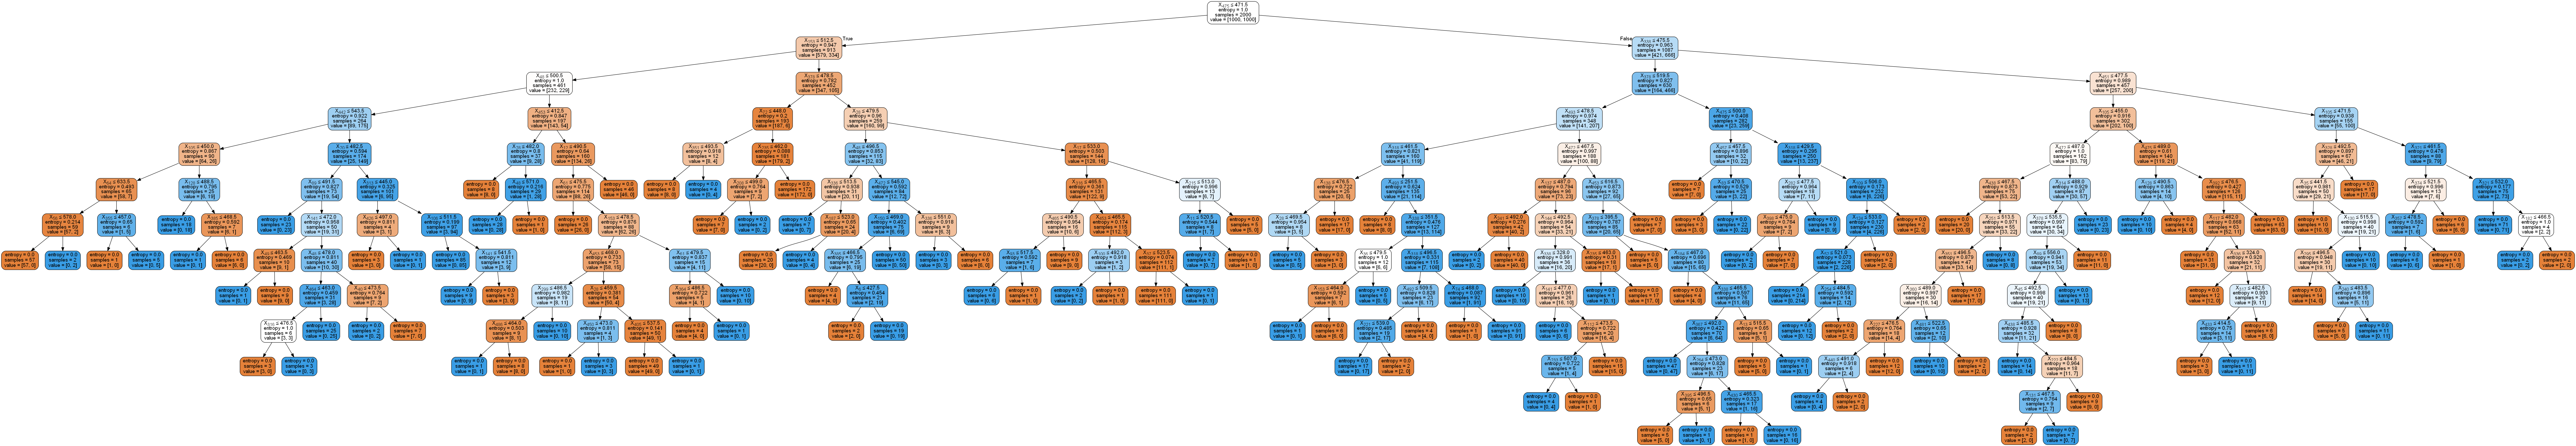

In [4]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

As the maximum depth increases, misclassification error decreases steadily in the training dataset. However, misclassification error of the validation dataset has a minimum value when the maximum depth is 5. This is because the model is overfitting when the maximum depth is greater than 5.

<br><br>
## b) wilt dataset
### (1) Load the dataset

In [5]:
X_train = pd.read_csv('wilt\wilt_train.csv', header = None)
print(color.BOLD + 'Summary of the basic information about X_train' + color.END)
print(X_train.info())
Y_train = pd.read_csv('wilt\wilt_train.labels', header = None)
print(color.BOLD + 'Summary of the basic information about Y_train' + color.END)
print(Y_train.info())

X_test = pd.read_csv('wilt\wilt_test.csv', header = None)
print(color.BOLD + 'Summary of the basic information about X_train' + color.END)
print(X_test.info())
Y_test = pd.read_csv('wilt\wilt_test.labels', header = None)

Summary of the basic information about X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 5 columns):
0    4339 non-null float64
1    4339 non-null float64
2    4339 non-null float64
3    4339 non-null float64
4    4339 non-null float64
dtypes: float64(5)
memory usage: 169.6 KB
None
Summary of the basic information about Y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 1 columns):
0    4339 non-null int64
dtypes: int64(1)
memory usage: 34.0 KB
None
Summary of the basic information about X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
0    500 non-null float64
1    500 non-null float64
2    500 non-null float64
3    500 non-null float64
4    500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB
None


### (2) Train the dataset

In [6]:
x = []

for i in range(10):
    #Train decision tree with max depth from 1 to 10
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i+1)
    clf.fit(X_train, Y_train)
    
    #Calculate decision accuracy score of training dataset and validation dataset
    x1 = clf.score(X_train, Y_train)
    x2 = clf.score(X_test, Y_test)
    
    #Save the errors
    x.append([i+1, 1 - x1, 1 - x2])

x = pd.DataFrame(data = x, columns = ['Depth', 'Train', 'Test'])

### (3) Tree Depth vs Misclassification Errors

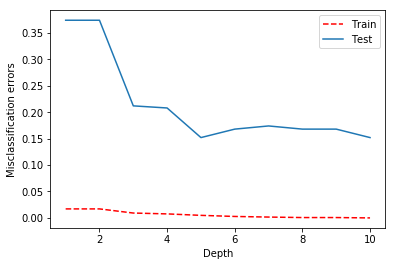

,Depth,Train,Test
0,1,0.0170546,0.374
1,2,0.0170546,0.374
2,3,0.00921871,0.212
3,4,0.00760544,0.208
4,5,0.00483982,0.152
5,6,0.00276561,0.168
6,7,0.00161327,0.174
7,8,0.000691404,0.168
8,9,0.000691404,0.168
9,10,0,0.152


In [7]:
# Plot the results
plt.plot(x['Depth'], x['Train'], 'r--', x['Depth'], x['Test'])
plt.xlabel('Depth')
plt.ylabel('Misclassification errors')
plt.legend(('Train', 'Test'))
plt.show()

x.style.apply(highlight_min, subset=['Train', 'Test'])

Even when the maximum depths of the decision trees are not deep, misclassification errors are very small in the training dataset (at most 1.7%). However, misclassification errors in the test dataset are at least 10 times higher than those errors in the training dataset.

In [8]:
print(color.BOLD + 'Train set information' + color.END)
print(Y_train.describe())
print(color.BOLD + '\n\nTest set information' + color.END)
print(Y_test.describe())

Train set information
                 0
count  4339.000000
mean      0.017055
std       0.129490
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


Test set information
                0
count  500.000000
mean     0.374000
std      0.484348
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


The train set and test set have different statistics. Only 1.7% of the train set equals 1 but 37.4% of the test set is 1. Therefore, the test set is biased and it cannot be used to test the algorithm.
<br><br>
## C) gisette dataset
### (1) Load the dataset

In [9]:
X_train = pd.read_csv('gisette\gisette_train.data', header = None, delimiter = ' ').dropna(axis='columns')
print(color.BOLD + 'Summary of the basic information about X_train' + color.END)
print(X_train.info())
Y_train = pd.read_csv('gisette\gisette_train.labels', header = None)
print(color.BOLD + 'Summary of the basic information about Y_train' + color.END)
print(Y_train.info())

X_valid = pd.read_csv('gisette\gisette_valid.data', header = None, delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('gisette\gisette_valid.labels', header = None)

Summary of the basic information about X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 5000 entries, 0 to 4999
dtypes: int64(5000)
memory usage: 228.9 MB
None
Summary of the basic information about Y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
0    6000 non-null int64
dtypes: int64(1)
memory usage: 47.0 KB
None


### (2) Train the dataset

In [10]:
x = []

for i in range(6):
    #Train decision tree with max depth from 1 to 6
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i+1)
    clf.fit(X_train, Y_train)
    
    #Calculate decision accuracy score of training dataset and validation dataset
    x1 = clf.score(X_train, Y_train)
    x2 = clf.score(X_valid, Y_valid)
    
    #Save the errors  
    x.append([i+1, 1 - x1, 1 - x2])
    
x = pd.DataFrame(data = x, columns = ['Depth', 'Train', 'Valid'])

### (3) Tree Depth vs Misclassification Errors

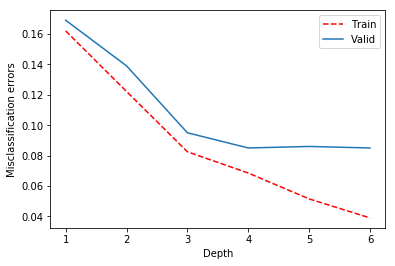

,Depth,Train,Valid
0,1,0.162,0.169
1,2,0.122167,0.139
2,3,0.0825,0.095
3,4,0.0685,0.085
4,5,0.0515,0.086
5,6,0.039,0.085


In [11]:
# Plot the results
plt.plot(x['Depth'], x['Train'], 'r--', x['Depth'], x['Valid'])
plt.xlabel('Depth')
plt.ylabel('Misclassification errors')
plt.legend(('Train', 'Valid'))
plt.show()

x.style.apply(highlight_min, subset=['Train', 'Valid'])

As the maximum depth increases, misclassification error decreases steadily in the training dataset. However, misclassification error of the validation dataset do not decrease or increase anymore when the depth reaches 4. This is because the model is overfitting when the maximum depth is greater than 5.


## Reference

http://scikit-learn.org/stable/modules/tree.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

https://pandas.pydata.org/pandas-docs/stable/style.html